### Inicijalizacija

In [80]:
import numpy as np
import random
import lavirint
from lavirint import Lavirint
from lavirint import LavirintEditor
from lavirint import LavirintAnimacija

## Zadatak 1

#### Definicija Stanja

In [81]:
class Stanje:
    def __init__(self, prethodno, polje, x, y, cena=1):
        self.prethodno = prethodno
        self.polje = polje
        self.x = x
        self.y = y
        self.cena = cena
    
    def to_dict(self, rekurzivno=False):
        stanje = {
            "polje": self.polje,
            "x": self.x,
            "y": self.y,
            "prethodno": None,
            "cena": self.cena
        }
        if rekurzivno and self.prethodno is not None:
            stanje["prethodno"] = self.prethodno.to_dict(rekurzivno)
        elif self.prethodno is not None:
            stanje["prethodno"] = {"x": self.prethodno.x, "y": self.prethodno.y, "cena": self.prethodno.cena}
        return stanje
    
    def __eq__(self, other):
        return hash(self) == hash(other)
    
    def __repr__(self):
        return "{} {} {} {} {}".format(self.x, self.y, self.polje["podloga"], self.polje["objekat"], self.cena)
    
    def __hash__(self):
        p1x = -1
        p1y = -1
        if self.prethodno is not None:
            p1x = self.prethodno.x
            p1y = self.prethodno.y
        return hash((self.x, self.y, p1x, p1y))

#### Definicija Cena

In [82]:
neprohodne_podloge = {"zid"}
recnik_cena = {
    "lava": 50,
    "led": 10,
    "pod": 1,
    "blato":50
}

def cena(lavirint, x, y):
    return recnik_cena.get(lavirint.dobavi_polje(x, y)["podloga"], 1)

#### Rad


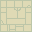
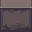
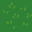
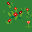
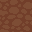
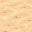
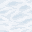
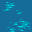
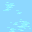
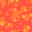
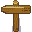
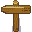
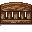
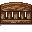
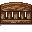
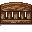
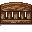
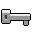
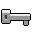
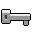
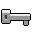
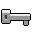
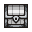
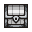
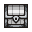
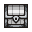
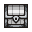
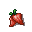
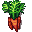

In [83]:
def sledeca_stanja(stanje, lavirint):
    nova_stanja = []
    if stanje.x+2 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+2, stanje.y)["podloga"] not in neprohodne_podloge and lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+2, stanje.y), stanje.x+2, stanje.y, cena(lavirint, stanje.x+2, stanje.y)))
    if stanje.x-2 >= 0 and lavirint.dobavi_polje(stanje.x-2, stanje.y)["podloga"] not in neprohodne_podloge and lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-2, stanje.y), stanje.x-2, stanje.y, cena(lavirint, stanje.x-2, stanje.y)))
    if stanje.y+2 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+2)["podloga"] not in neprohodne_podloge and lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y+2), stanje.x, stanje.y+2, cena(lavirint, stanje.x, stanje.y+2)))
    if stanje.y-2 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-2)["podloga"] not in neprohodne_podloge and lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y-2), stanje.x, stanje.y-2, cena(lavirint, stanje.x, stanje.y-2)))
    
    if stanje.x+1 < lavirint.sirina and lavirint.dobavi_polje(stanje.x+1, stanje.y)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y), stanje.x+1, stanje.y, cena(lavirint, stanje.x+1, stanje.y)))
    if stanje.x-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y), stanje.x-1, stanje.y, cena(lavirint, stanje.x-1, stanje.y)))
    if stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x, stanje.y+1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y+1), stanje.x, stanje.y+1, cena(lavirint, stanje.x, stanje.y+1)))
    if stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x, stanje.y-1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y-1), stanje.x, stanje.y-1, cena(lavirint, stanje.x, stanje.y-1)))
    return nova_stanja

def ucs(lavirint, pocetno_stanje, cilj):
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if trenutno.polje["objekat"] == cilj:
            return (trenutno, poseceni_lista)
        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)


lavirint = Lavirint("lavirint.json")

pocetno = random.choice(lavirint.dobavi_sa_objektom("pocetak"))
pocetno_stanje = Stanje(None, lavirint.dobavi_polje(*pocetno), *pocetno)

rezultat = ucs(lavirint, pocetno_stanje, "cilj")

animacija = LavirintAnimacija("slike", "lavirint.json", rezultat)
animacija.prikazi()

## Zadatak 2

#### Rad


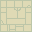
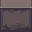
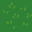
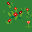
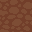
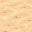
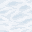
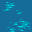
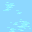
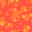
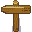
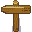
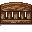
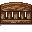
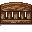
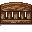
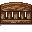
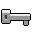
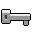
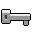
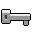
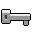
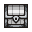
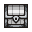
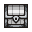
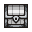
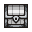
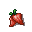
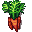

In [84]:
def ucs_chests(lavirint, pocetno_stanje):
    pokupljeni_chestovi = []
    spisak_chestova = {"kovceg": 3}
    
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if spisak_chestova["kovceg"] != 0:
            if trenutno.polje["objekat"] in spisak_chestova:
                if spisak_chestova[trenutno.polje["objekat"]] > 0:
                    neposecen = True
                    for pc in pokupljeni_chestovi:
                        if pc.polje["objekat"] == trenutno.polje["objekat"] and pc.x == trenutno.x and pc.y == trenutno.y:
                            neposecen = False
                    if neposecen:
                        pokupljeni_chestovi.append(trenutno)
                        spisak_chestova[trenutno.polje["objekat"]] -= 1
                        poseceni = set()
                        za_pretragu = []
        else:
             if trenutno.polje["objekat"] == "cilj":
                return (trenutno, poseceni_lista)
        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)

lavirint = Lavirint("lavirint.json")

pocetno = random.choice(lavirint.dobavi_sa_objektom("pocetak"))
pocetno_stanje = Stanje(None, lavirint.dobavi_polje(*pocetno), *pocetno)

rezultat = ucs_chests(lavirint, pocetno_stanje)

animacija = LavirintAnimacija("slike", "lavirint.json", rezultat)
animacija.prikazi()

## Zadatak 3

#### Heuristika

In [85]:
def h(stanje, lavirint, cilj):
    ciljevi = lavirint.dobavi_sa_objektom(cilj)
    udaljenosti = []
    for c in ciljevi:
        udaljenosti.append(np.sqrt((c[0]-stanje.x)**2 + (c[1] - stanje.y)**2))
    
    return max(udaljenosti)

#### Nova definicija cena sa lavom

In [86]:
neprohodne_podloge = {"zid"}
recnik_cena = {
    "lava": 50,
    "led": 10,
    "pod": 1,
    "blato":50
}

def kvadratna_funkcija(x):
    return 1*(x**2) + 0*(x)



##
def lava_u_blizini(lavirint, x, y):
    for i in range(-1, 2):
        for j in range(-1, 2):
            if lavirint.dobavi_polje(x + i, y + j)["podloga"] == "lava":
                distanca = np.sqrt(() + ())
                kvadratna_funkcija(distanca)
                return None ##TODO: FINISH THIS PART
    return 0


def cena(lavirint, x, y):
    toplotna_cena = lava_u_blizini(lavirint, x, y)
    return recnik_cena.get(lavirint.dobavi_polje(x, y)["podloga"], 1) + toplotna_cena
     

#### Rad

In [87]:
def a_zvezda(lavirint, pocetno_stanje, cilj):
    pokupljeni_chestovi = []
    spisak_chestova = {"kovceg": 3}
    trenutni_cilj = "kovceg"
    
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        
        if spisak_chestova["kovceg"] != 0:
            if trenutno.polje["objekat"] in spisak_chestova:
                if spisak_chestova[trenutno.polje["objekat"]] > 0:
                    neposecen = True
                    for pc in pokupljeni_chestovi:
                        if pc.polje["objekat"] == trenutno.polje["objekat"] and pc.x == trenutno.x and pc.y == trenutno.y:
                            neposecen = False
                    if neposecen:
                        pokupljeni_chestovi.append(trenutno)
                        spisak_chestova["kovceg"] -= 1
                        poseceni = set()
                        za_pretragu = []
                        
                        print("Uzeo chest, ostalo: " + str(spisak_chestova["kovceg"]))
                        if spisak_chestova["kovceg"] < 1:
                            print("Promenjen cilj")
                            trenutni_cilj = cilj
            
        if trenutno.polje["objekat"] == cilj:
            print("Nasao cilj")
            return (trenutno, poseceni_lista)
        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena + h(stanje, lavirint, trenutni_cilj)
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)

lavirint = Lavirint("lavirint.json")

pocetno = random.choice(lavirint.dobavi_sa_objektom("pocetak"))
pocetno_stanje = Stanje(None, lavirint.dobavi_polje(*pocetno), *pocetno)

rezultat = a_zvezda(lavirint, pocetno_stanje, "cilj")
animacija = LavirintAnimacija("slike", "lavirint.json", rezultat)
animacija.prikazi()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'